In [1165]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [1166]:
myDataset = pd.read_csv('vehicle.csv')

In [1167]:
myDataset.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [1168]:
myDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [1169]:
myDataset.count()

compactness                    846
circularity                    841
distance_circularity           842
radius_ratio                   840
pr.axis_aspect_ratio           844
max.length_aspect_ratio        846
scatter_ratio                  845
elongatedness                  845
pr.axis_rectangularity         843
max.length_rectangularity      846
scaled_variance                843
scaled_variance.1              844
scaled_radius_of_gyration      844
scaled_radius_of_gyration.1    842
skewness_about                 840
skewness_about.1               845
skewness_about.2               845
hollows_ratio                  846
class                          846
dtype: int64

In [1170]:
for column in myDataset.columns:
    print('Unique values for column '+column+' is : ')
    print(np.sort(myDataset[column].unique()))

Unique values for column compactness is : 
[ 73  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 119]
Unique values for column circularity is : 
[33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.
 51. 52. 53. 54. 55. 56. 57. 58. 59. nan]
Unique values for column distance_circularity is : 
[ 40.  42.  44.  47.  49.  50.  51.  52.  53.  54.  55.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.
  89.  90.  91.  92.  93.  94.  95.  96.  98. 100. 101. 102. 103. 104.
 105. 106. 107. 108. 109. 110. 112.  nan]
Unique values for column radius_ratio is : 
[104. 105. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120.
 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134.
 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.

From above observation it is clear that missing values are all blanks in dataset that are shown here as Nan

In [1171]:
myDataset.isna().any(axis=0)

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [1172]:
missingValues = myDataset.loc[myDataset.isna().any(axis=1),:]

In [1173]:
missingValues

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193,car
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,NaN,2.0,3.0,180.0,185,car
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus


In [1174]:
myDataset.count()

compactness                    846
circularity                    841
distance_circularity           842
radius_ratio                   840
pr.axis_aspect_ratio           844
max.length_aspect_ratio        846
scatter_ratio                  845
elongatedness                  845
pr.axis_rectangularity         843
max.length_rectangularity      846
scaled_variance                843
scaled_variance.1              844
scaled_radius_of_gyration      844
scaled_radius_of_gyration.1    842
skewness_about                 840
skewness_about.1               845
skewness_about.2               845
hollows_ratio                  846
class                          846
dtype: int64

In [1175]:
myDataset.drop(missingValues.index.values,axis=0,inplace=True)

In [1176]:
missingValues.index.values

array([  5,   9,  19,  35,  66,  70,  77,  78, 105, 118, 141, 159, 177,
       192, 207, 215, 222, 237, 249, 266, 273, 285, 287, 308, 319, 329,
       345, 372, 396, 419, 467, 496, 522], dtype=int64)

In [1177]:
myDataset.count()

compactness                    813
circularity                    813
distance_circularity           813
radius_ratio                   813
pr.axis_aspect_ratio           813
max.length_aspect_ratio        813
scatter_ratio                  813
elongatedness                  813
pr.axis_rectangularity         813
max.length_rectangularity      813
scaled_variance                813
scaled_variance.1              813
scaled_radius_of_gyration      813
scaled_radius_of_gyration.1    813
skewness_about                 813
skewness_about.1               813
skewness_about.2               813
hollows_ratio                  813
class                          813
dtype: int64

In [1178]:
missingValues.isna().any(axis=0)

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [1179]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

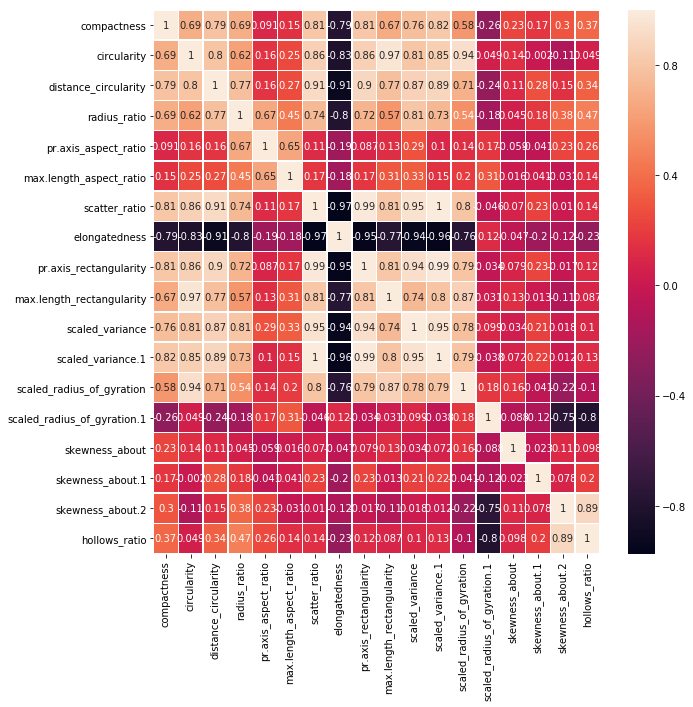

In [1180]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(myDataset.corr(),annot=True,linewidths=0.5,ax=ax)

In [1181]:
# max.length_rectangularity has no missing values and has 97% + correlation with circularity
# hollows_ratio has no missing values and has 89% correlation with skewness_about.2
# Once missing values for circularity is identified and substituted , we can find missing values for scatter ratio with compactness and circularity
# Scatter ratio will help us find missing values for distance_circularity,pr.axis_rectangularity

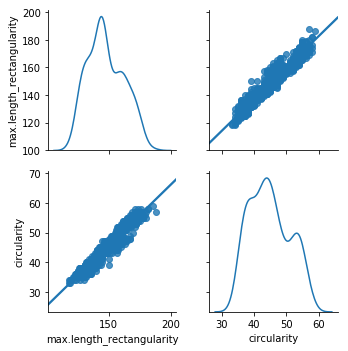

In [1182]:
sns.pairplot(myDataset[['max.length_rectangularity','circularity']],kind='reg',diag_kind='kde')

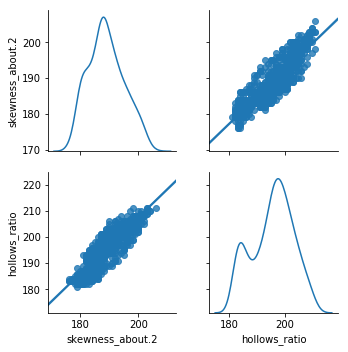

In [1183]:
sns.pairplot(myDataset[['skewness_about.2','hollows_ratio']],kind='reg',diag_kind='kde')

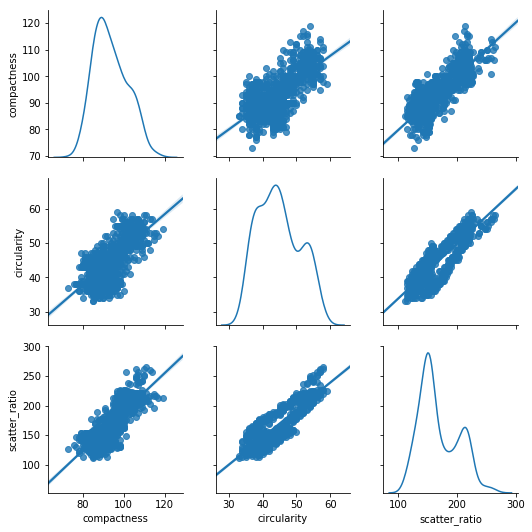

In [1184]:
sns.pairplot(myDataset[['compactness','circularity','scatter_ratio']],kind='reg',diag_kind='kde');

In [1185]:
myDataset['class']= myDataset['class'].astype('category')

myDataset['class']= myDataset['class'].cat.codes

myDataset= myDataset.apply(lambda x: x.fillna(x.median()),axis=0)

myDataset.isna().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [1186]:
myDataset.shape

(813, 19)

In [1187]:
def outliers(x): 
       return np.abs(x- x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))

In [1188]:
def replace(x):   # x is a vector
       out = x[outliers(x)]
       return x.replace(to_replace = [out.min(),out.max()], 
                        value = [np.percentile(x,5),np.percentile(x,95)])

In [1189]:
myDataset = myDataset.apply(replace,axis=1)

In [1190]:
myDataset = myDataset[~myDataset.apply(outliers).any(axis=1)]

In [1191]:
myDataset.shape

(635, 19)

# PCA

In [1192]:
X = myDataset[myDataset.columns[1:-1]]
y = myDataset["class"]

In [1193]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3, random_state=7)

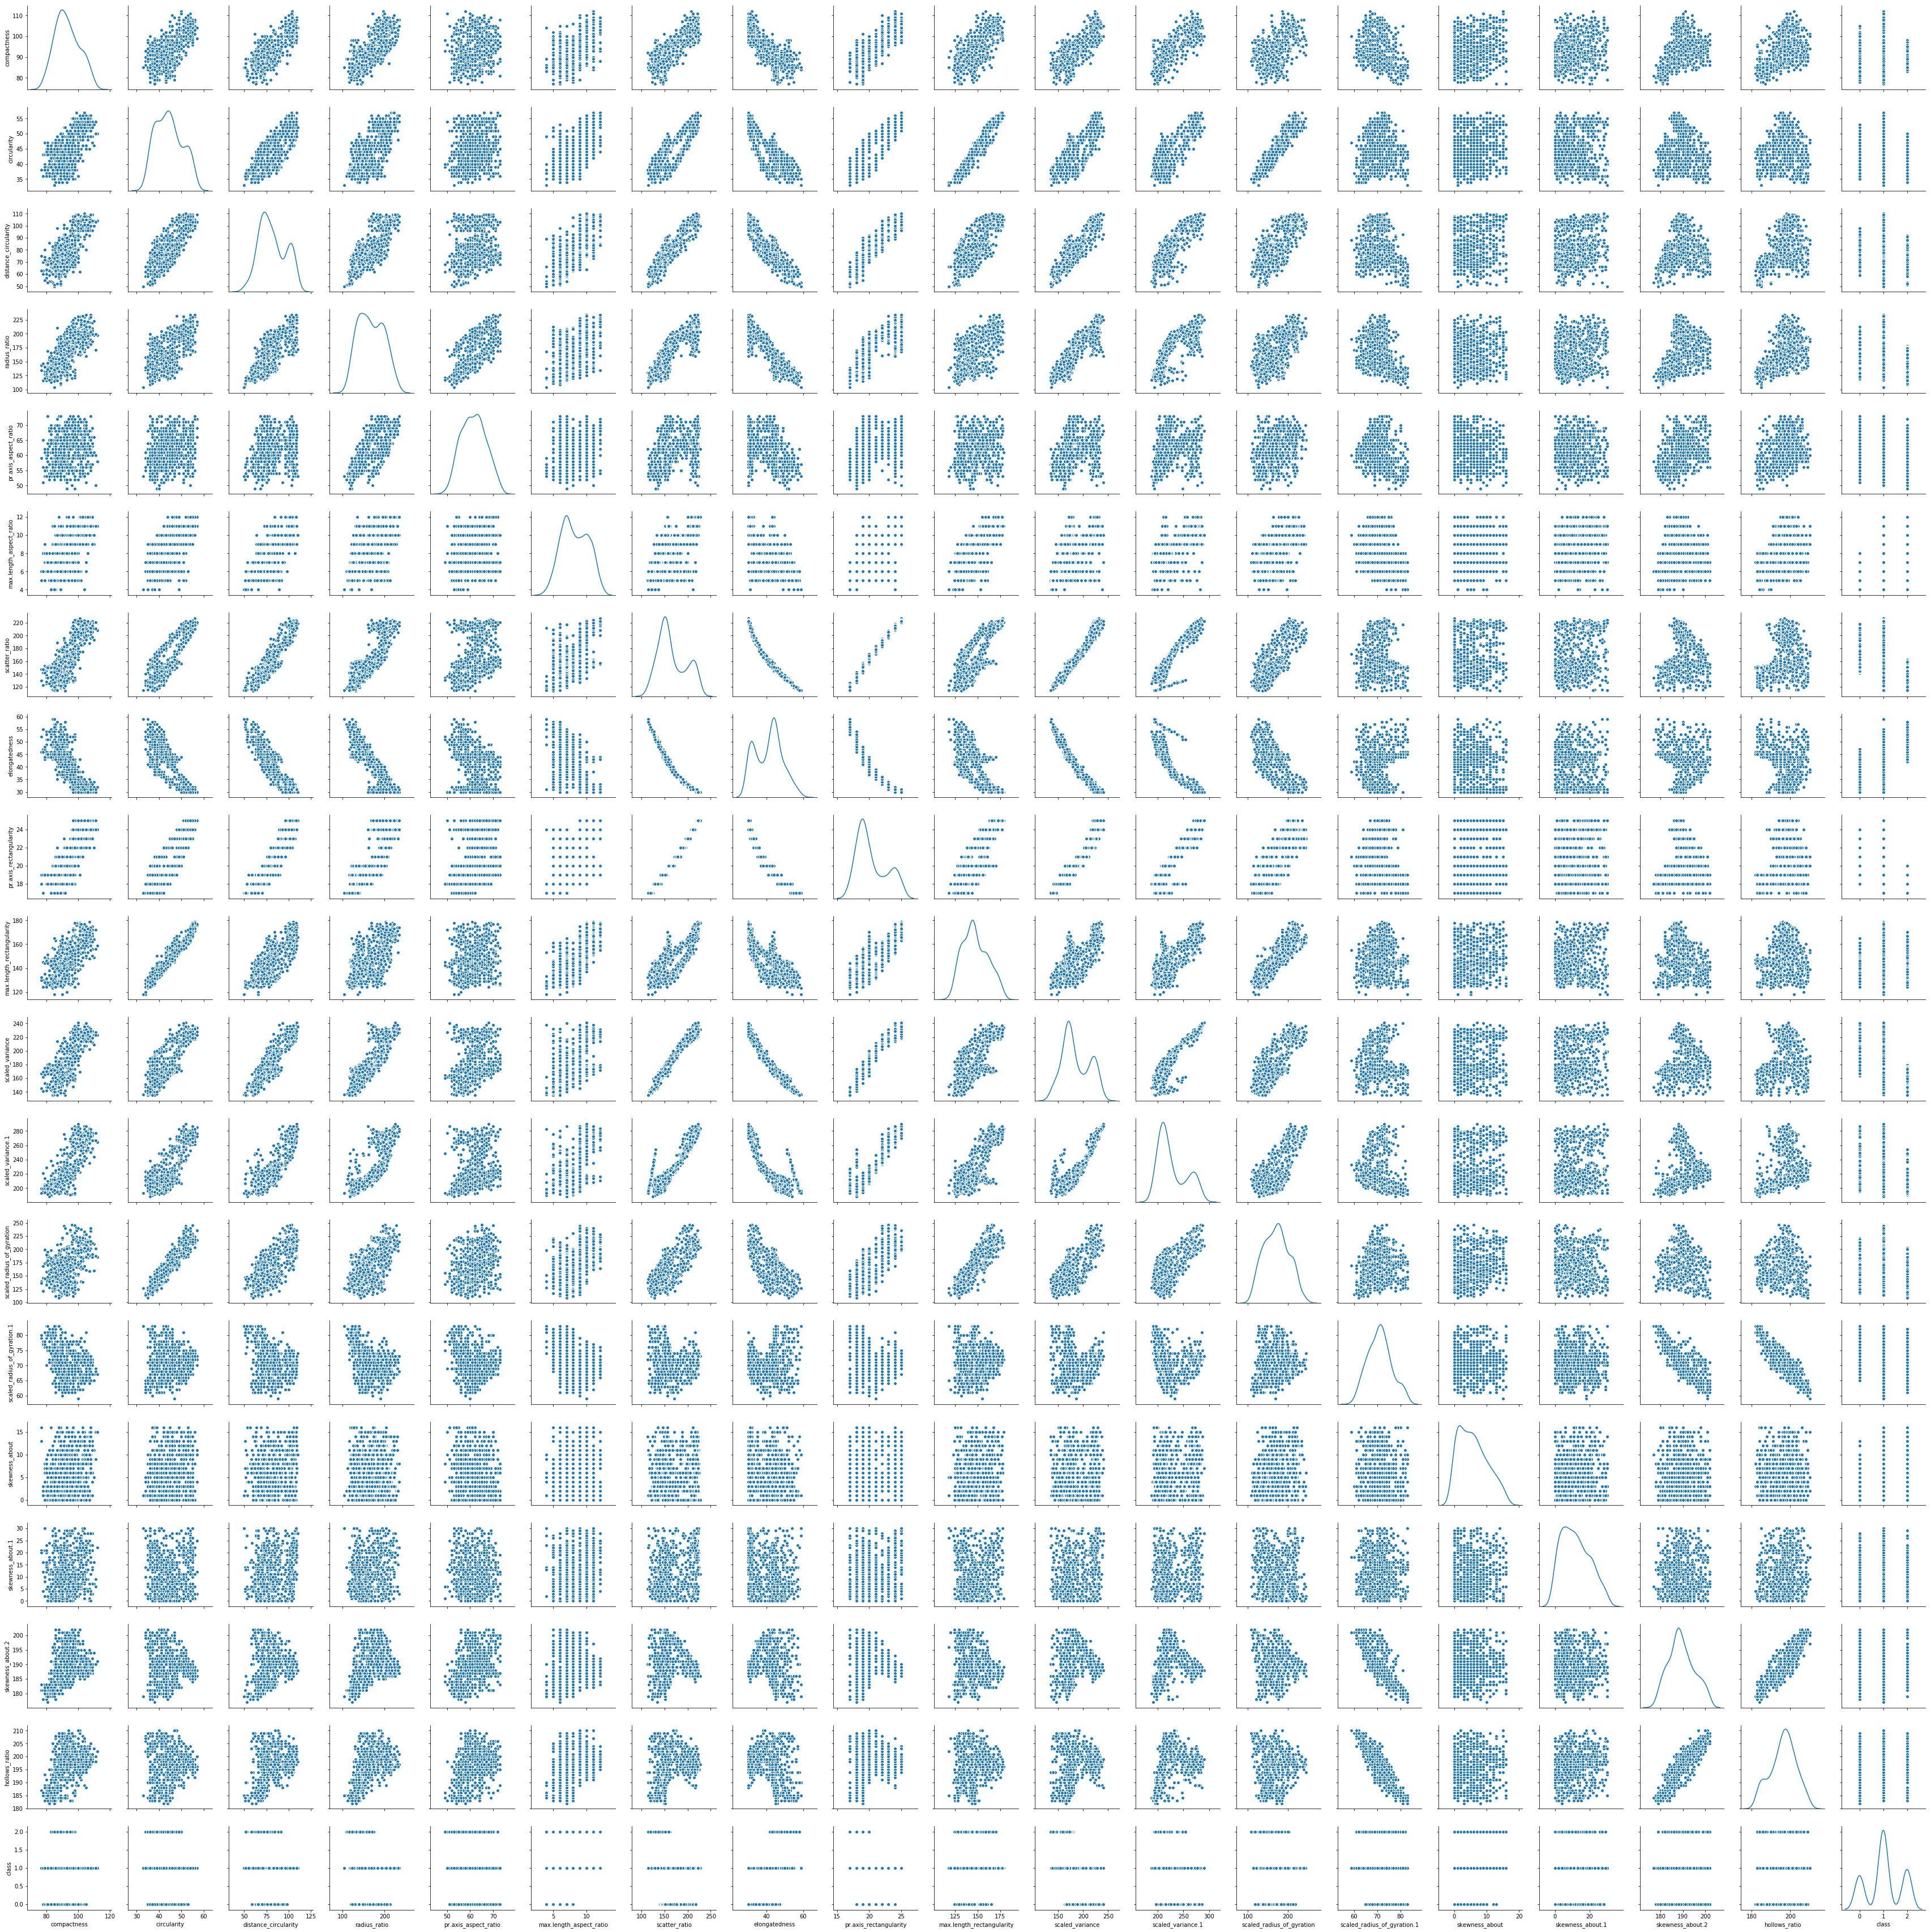

In [1194]:
sns.pairplot(myDataset, diag_kind='kde') 

In [1195]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1196]:
regression_model.coef_

array([-0.0851395 ,  0.02755834,  0.01240765, -0.04114988,  0.13861283,
       -0.01840758,  0.13223057,  0.03857584,  0.04098133,  0.01203038,
        0.00490437, -0.00105049,  0.01143868,  0.008262  , -0.00977699,
       -0.02266107,  0.02689611])

In [1197]:
regression_model.intercept_

-12.245288392621033

In [1198]:
score_without_PCA= regression_model.score(X_test, y_test)
print(score_without_PCA)

0.6819907250038661


# PCA

In [1199]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)


In [1200]:

X_std.shape


(635, 17)

In [1201]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00157729  0.78724105  0.63524065  0.23037044  0.62819472  0.83562922
  -0.79626232  0.83620059  0.96224615  0.7963165   0.76681219  0.93802466
   0.06194791  0.15390042 -0.01431721 -0.13567372  0.08262554]
 [ 0.78724105  1.00157729  0.80179455  0.24762729  0.72954446  0.92289667
  -0.90491988  0.91635784  0.75944666  0.90710129  0.84646336  0.69824691
  -0.22265526  0.1023555   0.22223224  0.07621258  0.32939908]
 [ 0.63524065  0.80179455  1.00157729  0.66925218  0.45842085  0.83373838
  -0.86978719  0.80735814  0.5571252   0.85587703  0.80244825  0.56189996
  -0.3898562   0.02802585  0.14073549  0.39424831  0.5149896 ]
 [ 0.23037044  0.24762729  0.66925218  1.00157729  0.07180981  0.27623305
  -0.35844637  0.24134576  0.16246782  0.31217751  0.26278024  0.21763509
  -0.2168679  -0.07645579 -0.05494241  0.35485592  0.36989476]
 [ 0.62819472  0.72954446  0.45842085  0.07180981  1.00157729  0.61710721
  -0.57045562  0.63030395  0.71276589  0.55085603  0.5483754

In [1202]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n %s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
 %s [[-2.93832295e-01 -1.61966563e-01 -7.92948063e-02  2.03516821e-01
   6.90314375e-02  9.86774893e-02 -3.66059766e-01  7.05369190e-02
   9.76595658e-03  2.24775035e-01 -9.33568680e-02  2.60795776e-01
  -6.77146335e-01  2.98624680e-01 -1.05755960e-01  2.24633758e-03
  -1.58037554e-03]
 [-3.11705491e-01  1.13485070e-02  1.31312638e-01 -3.90582718e-02
   7.55027292e-02 -1.26771565e-02  2.38145958e-01  3.10914097e-01
  -1.11377513e-01  7.14165812e-02  5.06943727e-03 -4.91637772e-02
   1.30424912e-02  3.82349291e-02  1.18262529e-01 -8.30119176e-01
  -5.99602167e-03]
 [-2.87120298e-01  1.99149715e-01 -2.00584673e-01 -1.31252556e-01
  -1.67445638e-01  2.82615214e-02  1.52423909e-01  1.05120987e-01
  -1.37491368e-01  9.31506057e-02 -6.03475783e-02 -3.28920884e-01
   1.98963417e-01  5.78825007e-01 -3.62505596e-01  1.74071461e-01
   2.85608044e-01]
 [-1.19335101e-01  2.27896352e-01 -5.78424796e-01 -1.26092524e-01
  -3.15769521e-01  5.72701516e-01  1.08223905e-01 -9.10045592e-02


In [1203]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.159187488483843, array([-0.2938323 , -0.31170549, -0.2871203 , -0.1193351 , -0.22813655,
       -0.32176149,  0.31648914, -0.31931428, -0.28110419, -0.31571679,
       -0.30246117, -0.26741067,  0.05641321, -0.03765936, -0.05358226,
       -0.03446417, -0.10849983])), (3.112083815990634, array([-0.16196656,  0.01134851,  0.19914971,  0.22789635, -0.02388711,
       -0.04590162, -0.00337827, -0.05758929, -0.15949939, -0.02975939,
        0.0188837 , -0.21599227, -0.50904035, -0.01963891,  0.03987414,
        0.53359114,  0.50683631])), (1.1984024675247689, array([-0.07929481,  0.13131264, -0.20058467, -0.5784248 ,  0.27817525,
        0.02647862,  0.04467599,  0.05687649,  0.00702606, -0.02503575,
        0.04161789, -0.14091682, -0.15158349,  0.33692312,  0.5889217 ,
       -0.0228881 ,  0.11060411])), (1.1427414761546988, array([ 0.20351682, -0.03905827, -0.13125256, -0.12609252,  0.1622058 ,
       -0.11225509,  0.12038289, -0.0968485 ,  0.22831791, -0.15105073,
       -0.0575765

In [1204]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%




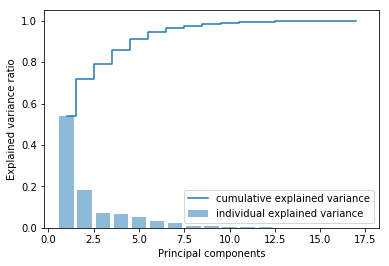

In [1205]:
plt.bar(range(1,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [1206]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:13])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [1207]:
X_std.shape, P_reduce.shape, Proj_data_df.shape

((635, 17), (13, 17), (635, 13))

In [1208]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

In [1209]:
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

array([ 0.03377489,  0.01465846,  0.23527417,  0.20721278,  0.29542183,
        0.22546893,  0.13014059, -0.30448289, -0.41988148,  0.09847464,
       -0.50995987,  0.32967427, -0.35483352])

In [1210]:
regression_model.intercept_

1.039702712910675

In [1211]:
score_with_PCA= regression_model.score(X_test, y_test)

In [1212]:
print("score without PCA {a} ".format(a=score_without_PCA))
print("score with PCA {a} ".format(a=score_with_PCA))

score without PCA 0.6819907250038661 
score with PCA 0.649177341928191 


# SVM

In [1213]:
from matplotlib.colors import ListedColormap

In [1214]:
myDataset.shape

(635, 19)

In [1215]:
myDataset.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [1216]:
X=myDataset[myDataset.columns[1:-1]]
Y=myDataset["class"]

In [1217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# SVM  Linear 

In [1218]:
from sklearn import svm
model = svm.SVC(kernel = 'linear', C = 100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [1219]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9319371727748691

# SVM RBF

In [1220]:
model2 = svm.SVC(kernel = 'rbf')
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

In [1221]:
accuracy_score(y_test, y_pred2)

0.5130890052356021

In [1222]:
from sklearn.model_selection import GridSearchCV

In [1223]:
my_param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [1224]:
my_grid= GridSearchCV(estimator=svm.SVC(), param_grid=my_param_grid, cv=4)

In [1225]:
my_grid.fit(X, y)

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']}, {'C': [0.01, 0.05, 0.5, 1], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1226]:
my_grid.grid_scores_

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.96378, std: 0.01201, params: {'C': 0.01, 'kernel': 'linear'},
 mean: 0.97323, std: 0.01121, params: {'C': 0.05, 'kernel': 'linear'},
 mean: 0.96220, std: 0.00754, params: {'C': 0.5, 'kernel': 'linear'},
 mean: 0.95591, std: 0.00870, params: {'C': 1, 'kernel': 'linear'},
 mean: 0.51654, std: 0.00269, params: {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.51654, std: 0.00269, params: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.59370, std: 0.00473, params: {'C': 0.05, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.64252, std: 0.01945, params: {'C': 0.05, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.89291, std: 0.03746, params: {'C': 0.5, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.82835, std: 0.01457, params: {'C': 0.5, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.92913, std: 0.03563, params: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.89134, std: 0.01675, params: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}]

In [1227]:
my_grid.best_params_

{'C': 0.05, 'kernel': 'linear'}